In [18]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Linear Regression

### Loading data

In [2]:
sales_rainfall = pd.read_csv("../../datasets/sales_vs_rainfall.csv")
sales_rainfall.head()

,rainfall_in_mm,sales_in_inr
0,2,100000
1,5,95000
2,8,80000
3,9,320000
4,12,50000


## Visualization

### Scatter plot

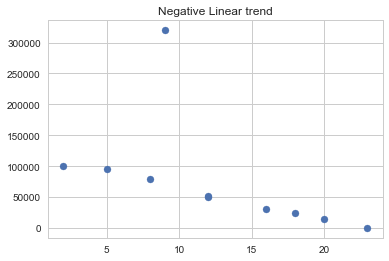

In [3]:
plt.scatter(sales_rainfall.loc[:,"rainfall_in_mm"], sales_rainfall.loc[:,"sales_in_inr"])
plt.title("Negative Linear trend")

### Boxplot

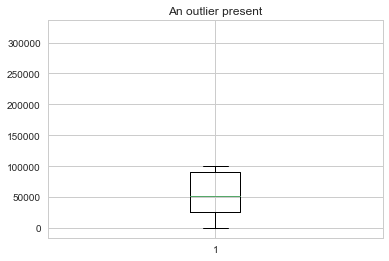

In [4]:
plt.boxplot(sales_rainfall.loc[:,"sales_in_inr"])
plt.title("An outlier present")

### Covariance Matrix

In [5]:
sales_rainfall.cov()

,rainfall_in_mm,sales_in_inr
rainfall_in_mm,45.388889,-3.263833e+05
sales_in_inr,-326383.333333,8.437197e+09


### Correlation Matrix

In [6]:
sales_rainfall.corr()

,rainfall_in_mm,sales_in_inr
rainfall_in_mm,1.000000,-0.527417
sales_in_inr,-0.527417,1.000000


### Scaling the dataset

In [7]:
cols = sales_rainfall.columns   # Temporary holding column names
sales_rainfall = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(sales_rainfall))
sales_rainfall.columns = cols
sales_rainfall.head(5)

,rainfall_in_mm,sales_in_inr
0,0.000000,0.312285
1,0.142857,0.296655
2,0.285714,0.249766
3,0.333333,1.000000
4,0.476190,0.155986


### Building linear regression model

In [8]:
model = LinearRegression()
model.fit(sales_rainfall.iloc[:,0].values.reshape(-1,1), 
          sales_rainfall.iloc[:,1].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Parameters

In [9]:
model.intercept_

array([0.47550363])

In [10]:
model.coef_

array([[-0.47204508]])

### Estimated values

In [11]:
est_val = model.predict(sales_rainfall.iloc[:,0].values.reshape(-1,1))
est_val

array([[0.47550363],
       [0.40806862],
       [0.34063361],
       [0.31815527],
       [0.25072026],
       [0.25072026],
       [0.16080691],
       [0.11585023],
       [0.07089356],
       [0.00345855]])

### Mean Squared Error (MSE)

In [12]:
sklearn.metrics.mean_squared_error(sales_rainfall.iloc[:,1].values.reshape(-1,1), est_val)

0.05356090644463798

### Residual plot

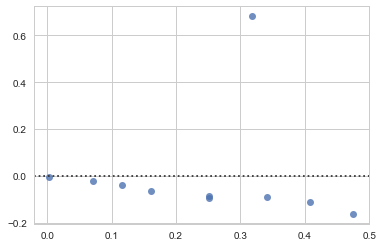

In [13]:
# sns.residplot(estimated_values, residuals)
sns.residplot(est_val, 
              sales_rainfall.iloc[:,1].values.reshape(-1,1) - est_val)

### Removing outlier and building model once again

In [14]:
# Replacing outlier with median of column data
sales_rainfall.iloc[3,1] = np.median(sales_rainfall.iloc[:,1])
sales_rainfall

,rainfall_in_mm,sales_in_inr
0,0.000000,0.312285
1,0.142857,0.296655
2,0.285714,0.249766
3,0.333333,0.159112
4,0.476190,0.155986
5,0.476190,0.162238
6,0.666667,0.093467
7,0.761905,0.077837
8,0.857143,0.046577
9,1.000000,0.000000


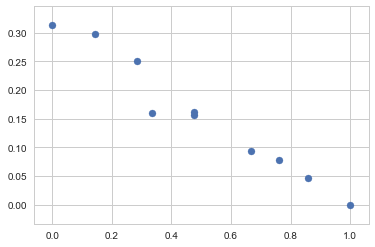

In [15]:
plt.scatter(sales_rainfall.iloc[:,0], sales_rainfall.iloc[:,1])

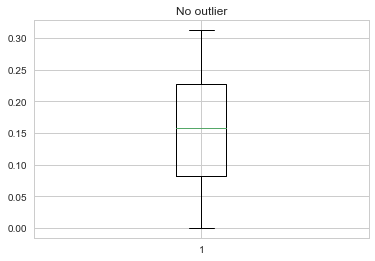

In [16]:
plt.boxplot(sales_rainfall.iloc[:,1])
plt.title("No outlier")

In [17]:
model = LinearRegression()
model.fit(sales_rainfall.iloc[:,0].values.reshape(-1,1), 
          sales_rainfall.iloc[:,1].values.reshape(-1,1))
est_val = model.predict(sales_rainfall.iloc[:,0].values.reshape(-1,1))
print("Updated MSE = ", sklearn.metrics.mean_squared_error(sales_rainfall.iloc[:,1].values.reshape(-1,1), est_val))

Updated MSE =  0.0004078178005144805


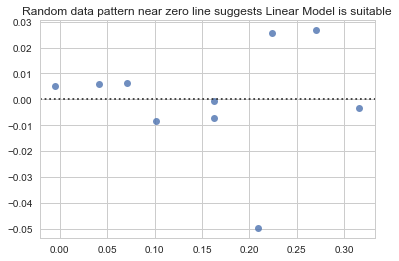

In [18]:
sns.residplot(est_val, 
              sales_rainfall.iloc[:,1].values.reshape(-1,1) - est_val)
plt.title("Random data pattern near zero line suggests Linear Model is suitable")

# Multiple Linear Regression

In [19]:
data = pd.read_csv("../../datasets/mult_reg.csv")
data.head()

,y,X1,X2,X3,X4
0,2,5,150,40,68
1,8,12,120,40,60
2,9,8,100,40,98
3,15,20,85,40,43
4,26,30,60,40,89


## Visualization

### Scatter pair plot

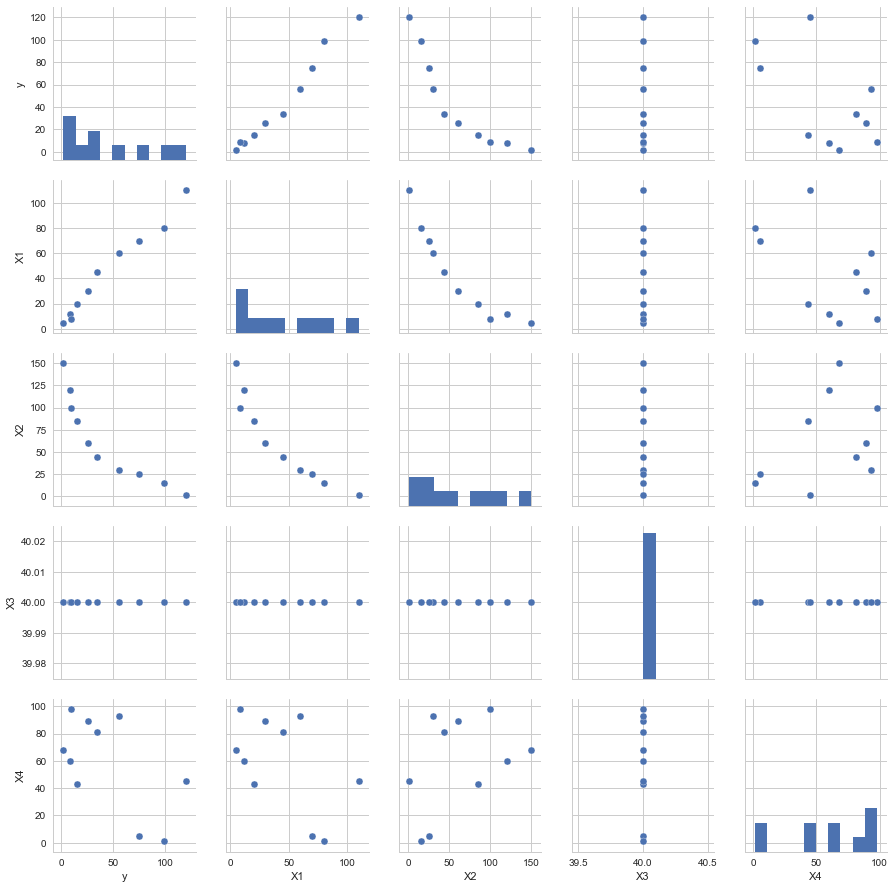

In [20]:
sns.pairplot(data)

### Boxplot

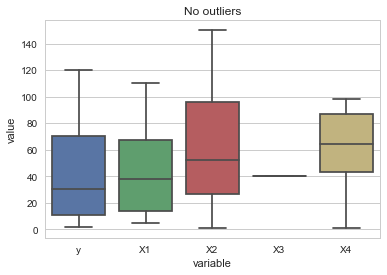

In [21]:
sns.boxplot(x = "variable", y = "value", data = pd.melt(data))
plt.title("No outliers")

### Correlation matrix

In [22]:
data.corr()

,y,X1,X2,X3,X4
y,1.000000,0.986837,-0.890781,NaN,-0.585767
X1,0.986837,1.000000,-0.922658,NaN,-0.514193
X2,-0.890781,-0.922658,1.000000,NaN,0.390793
X3,NaN,NaN,NaN,NaN,NaN
X4,-0.585767,-0.514193,0.390793,NaN,1.000000


### Building multiple linear regression model

In [23]:
model = LinearRegression()
model.fit(data.iloc[:,1:], data.iloc[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Parameters

In [24]:
model.intercept_

-5.0670424232529285

In [25]:
model.coef_

array([ 1.18461784,  0.06559739,  0.        , -0.1164456 ])

In [26]:
pd.DataFrame({"Variable":data.columns[1:],"Coefficients":model.coef_}).reindex(columns=["Variable", "Coefficients"])

,Variable,Coefficients
0,X1,1.184618
1,X2,0.065597
2,X3,0.000000
3,X4,-0.116446


### Estimated Values

In [27]:
est_val = model.predict(data.iloc[:,1:])
est_val

array([  2.77735509,  10.03332297,  -0.44202913,  19.19393213,
        24.04367806,  41.69495221,  57.14850912,  78.91391348,
        90.56990037, 120.06646571])

### MSE

In [28]:
sklearn.metrics.mean_squared_error(data.iloc[:,0].values.reshape(-1,1), est_val)

26.22279384222898

### Residual plot

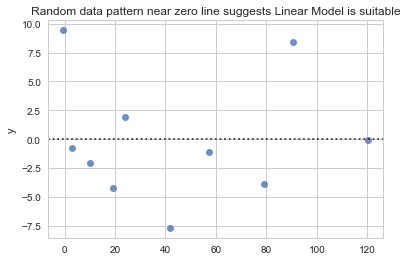

In [29]:
sns.residplot(est_val, 
              data.iloc[:,0] - est_val)
plt.title("Random data pattern near zero line suggests Linear Model is suitable")

### Variable Selection

In [30]:
# Recursively Feature Elimination - removes features with low weights recursively
from sklearn.feature_selection import RFE
d = RFE(model, 2, step = 1)
f = d.fit(data.iloc[:,1:], data.iloc[:,0])
print(f.support_)
print(f.ranking_)

[ True False False  True]
[1 2 3 1]


### Building model on selected features

In [31]:
model = LinearRegression()
model.fit(data.iloc[:,[1,4]], data.iloc[:,0])
est_val = model.predict(data.iloc[:,[1,4]])
sklearn.metrics.mean_squared_error(data.iloc[:,0].values.reshape(-1,1), est_val)
# Even after removal of 2 features current MSE is still near to last model MSE (26) which consists of all features. 

27.52384747118117

# Polynomial Regression

In [3]:
pdata = pd.read_csv("../../datasets/poly_reg.csv")
pdata.head()

,rainfall_in_mm,umbrella_sales
0,2,5
1,8,15
2,10,35
3,15,24
4,17,18


### Training and Testing Data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
       pdata.iloc[:,0], pdata.iloc[:,1], test_size = 0.33, # Test data will be 33% of data
       random_state = 42) # assign it to some values, to get same values on each fresh run
print(len(X_train), len(y_train), len(X_test), len(y_test))   # 33% of 15 values = 4.95 approx to 5

10 10 5 5


### Visualization

Text(0,0.5,'Umbrella sales')

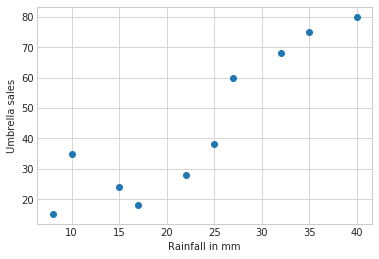

In [5]:
plt.scatter(X_train, y_train)
plt.xlabel("Rainfall in mm")
plt.ylabel("Umbrella sales")

## Building polynomial regression models

In [23]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [47]:
degree = np.arange(0, 9)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X_train.values.reshape(-1, 1), y_train.values.reshape(-1,1),
                                          'polynomialfeatures__degree', degree, cv=3)

Text(0.5,1,'Order 4 is the best degree')

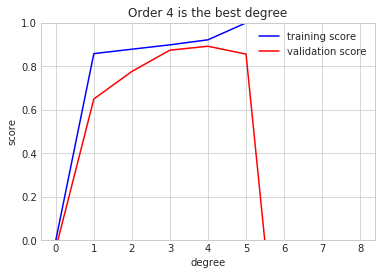

In [48]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.title('Order 4 is the best degree')

### Building an order 4 polynomial regression

In [61]:
poly_train = PolynomialFeatures(4).fit_transform(X_train.values.reshape(-1, 1)) 
poly_test = PolynomialFeatures(4).fit_transform(X_test.values.reshape(-1, 1)) 
model = LinearRegression()
model.fit(poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Training MSE

In [62]:
est_val = model.predict(poly_train)
sklearn.metrics.mean_squared_error(y_train.values.reshape(-1,1), est_val)

39.76331526510016

### Testing MSE

In [65]:
est_val = model.predict(poly_test)
sklearn.metrics.mean_squared_error(y_test.values.reshape(-1,1), est_val)

68.17802905371457

### Viz. order 4 polynomial

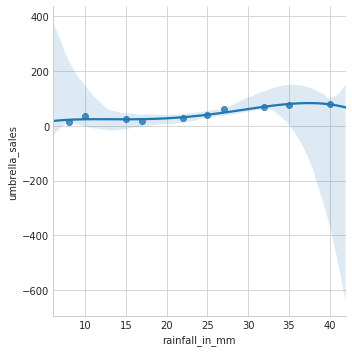

In [81]:
dfviz = pd.DataFrame([X_train.reset_index(drop=True), y_train.reset_index(drop=True)]).T
sns.lmplot(x="rainfall_in_mm", y="umbrella_sales", data=dfviz, order=4, palette='Set2')